In [32]:
import json
import time
import warnings
from qiskit import transpile
from qiskit.quantum_info import Pauli
from qiskit_aer import AerSimulator

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import ClassicalRegister, QuantumRegister
from qiskit import QuantumCircuit
from qiskit.circuit.library import RealAmplitudes
from qiskit.quantum_info import Statevector
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals

from qiskit_machine_learning.circuit.library import RawFeatureVector
from qiskit_machine_learning.neural_networks import SamplerQNN

algorithm_globals.random_seed = 42

In [17]:
def ansatz(num_qubits):
    return RealAmplitudes(num_qubits, reps=5)

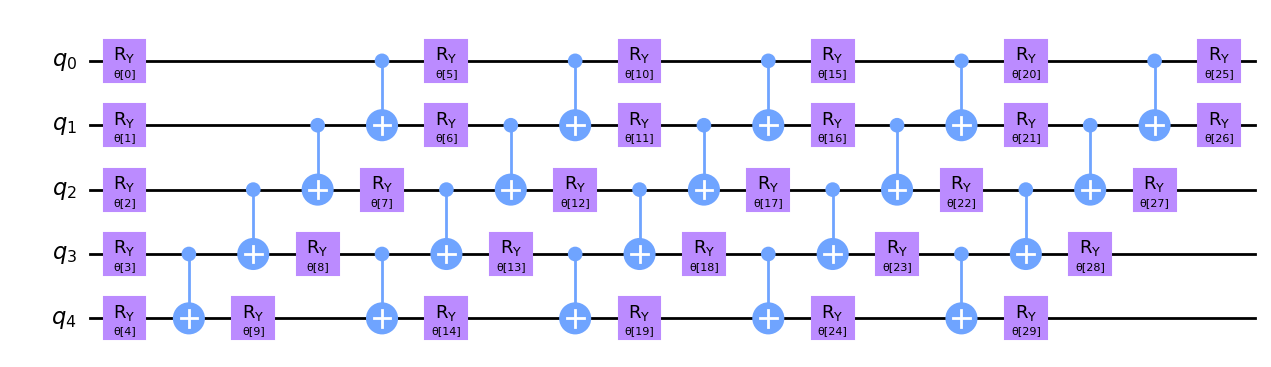

In [19]:
num_qubits = 5
circ = ansatz(num_qubits)
circ.decompose().draw(output="mpl", style="clifford")

In [46]:
from qiskit.quantum_info import Pauli
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.quantum_info import Operator

simulator_basic = BasicSimulator()



## here is the optimized theta array

s=[ 2.01427763,  2.40936016,  0.2146867 ,  0.99036023,  2.03046934,
        0.04110537,  0.55103087,  0.94937206,  0.48027035,  0.32889186,
        1.55885499,  0.35718271,  1.95675327,  0.03545981,  0.39603375,
        1.23112602,  0.11953064,  0.15558295, -0.14841162, -0.09632555,
       -0.3000918 ,  0.20777151,  0.66830925,  1.61232516,  1.74736482,
        0.78072903,  0.5902553 ,  0.4437412 , -0.02379735, -0.18228443]

In [43]:
s=[ 2.01427763,  2.40936016,  0.2146867 ,  0.99036023,  2.03046934,
        0.04110537,  0.55103087,  0.94937206,  0.48027035,  0.32889186,
        1.55885499,  0.35718271,  1.95675327,  0.03545981,  0.39603375,
        1.23112602,  0.11953064,  0.15558295, -0.14841162, -0.09632555,
       -0.3000918 ,  0.20777151,  0.66830925,  1.61232516]

In [54]:
def auto_encoder_circuit(num_latent, num_trash):
    qr = QuantumRegister(num_latent + num_trash, "q")
    circuit = QuantumCircuit(qr)

    pauli_op=SparsePauliOp.from_list([('Z'*(num_latent+num_trash), 1.0)])
  
    circuit.unitary(pauli_op,qubits=list(range(num_latent+num_trash)))
    
    circuit.compose(ansatz(num_latent + num_trash), range(0, num_latent + num_trash), inplace=True)

    return circuit


num_latent = 4
num_trash = 0
circuit = auto_encoder_circuit(num_latent, num_trash)
circuit.draw(output="mpl", style="clifford")
circuit.num_parameters
a = circuit.assign_parameters(s,inplace=False)

circOp = Operator.from_circuit(a)
circOp.draw("latex")

<IPython.core.display.Latex object>

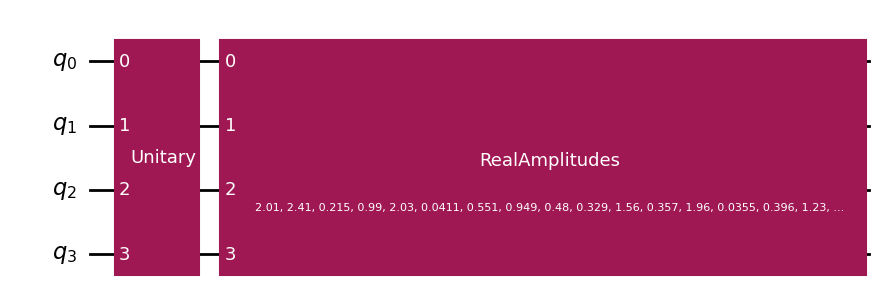

In [55]:
a.draw('mpl')